In [36]:
%load_ext autoreload
%autoreload 2

import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import pandas as pd
import numpy as np
from AnalysisUtils.analysis_utils import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Reads data of fm records and input bar data

In [37]:
%%time
duka_5m_df = pd.read_csv("../data/yht_duka_5m_eur_with_floatingprofits_table.csv", index_col=["datetime"])
duka_5m_df.head(10)

CPU times: user 37.6 ms, sys: 3.71 ms, total: 41.3 ms
Wall time: 41.2 ms


,symbol,open,high,low,close,volume,floating_profit
datetime,,,,,,,
2020-10-14 08:05:00,EURUSD,1.17440,1.17446,1.17404,1.17407,6584.5599,0.0
2020-10-14 08:10:00,EURUSD,1.17407,1.17424,1.17368,1.17376,6131.8500,0.0
2020-10-14 08:15:00,EURUSD,1.17375,1.17424,1.17375,1.17411,6511.8300,0.0
2020-10-14 08:20:00,EURUSD,1.17412,1.17430,1.17398,1.17415,5858.7401,0.0
2020-10-14 08:25:00,EURUSD,1.17415,1.17453,1.17396,1.17453,6695.3600,0.0
2020-10-14 08:30:00,EURUSD,1.17454,1.17536,1.17445,1.17496,9785.6300,0.0
2020-10-14 08:35:00,EURUSD,1.17496,1.17521,1.17473,1.17479,6662.6300,0.0
2020-10-14 08:40:00,EURUSD,1.17478,1.17486,1.17444,1.17458,5461.9901,0.0
2020-10-14 08:45:00,EURUSD,1.17459,1.17484,1.17430,1.17435,7329.7901,0.0


In [38]:
%%time
yht_rc_big_table_df = pd.read_csv("../data/yht_eur_big_table.csv", index_col=["dt_point_holding"])
yht_rc_big_table_df.head(10)

CPU times: user 160 ms, sys: 11.8 ms, total: 172 ms
Wall time: 171 ms


,symbol,action,lots,open_date,close_date,open_price,close_price,profits,pips,commission,...,profits_calc,commission_by_pips,date_var,swap_per_date_var_and_pip,open_date_mod_5,close_date_mod_5,dt_range,dt_point_holding.1,dt_range_inter_num,cur_holding_cnt
dt_point_holding,,,,,,,,,,,,,,,,,,,,,
2020-10-14 10:05:00,EURUSD,sell,0.01,2020-10-14 10:08:18,2020-10-14 12:31:20,1.17321,1.17625,-3.04,-30.4,-0.04,...,-3.08,-0.4,0,0.0,2020-10-14 10:05:00,2020-10-14 12:30:00,0 days 02:25:00,2020-10-14 10:05:00,30,1
2020-10-14 10:10:00,EURUSD,sell,0.01,2020-10-14 10:08:18,2020-10-14 12:31:20,1.17321,1.17625,-3.04,-30.4,-0.04,...,-3.08,-0.4,0,0.0,2020-10-14 10:05:00,2020-10-14 12:30:00,0 days 02:25:00,2020-10-14 10:10:00,30,1
2020-10-14 10:15:00,EURUSD,sell,0.01,2020-10-14 10:08:18,2020-10-14 12:31:20,1.17321,1.17625,-3.04,-30.4,-0.04,...,-3.08,-0.4,0,0.0,2020-10-14 10:05:00,2020-10-14 12:30:00,0 days 02:25:00,2020-10-14 10:15:00,30,1
2020-10-14 10:20:00,EURUSD,sell,0.01,2020-10-14 10:08:18,2020-10-14 12:31:20,1.17321,1.17625,-3.04,-30.4,-0.04,...,-3.08,-0.4,0,0.0,2020-10-14 10:05:00,2020-10-14 12:30:00,0 days 02:25:00,2020-10-14 10:20:00,30,1
2020-10-14 10:25:00,EURUSD,sell,0.01,2020-10-14 10:08:18,2020-10-14 12:31:20,1.17321,1.17625,-3.04,-30.4,-0.04,...,-3.08,-0.4,0,0.0,2020-10-14 10:05:00,2020-10-14 12:30:00,0 days 02:25:00,2020-10-14 10:25:00,30,2
2020-10-14 10:25:00,EURUSD,sell,0.01,2020-10-14 10:29:19,2020-10-14 12:31:20,1.17359,1.17625,-2.66,-26.6,-0.04,...,-2.70,-0.4,0,0.0,2020-10-14 10:25:00,2020-10-14 12:30:00,0 days 02:05:00,2020-10-14 10:25:00,26,2
2020-10-14 10:30:00,EURUSD,sell,0.01,2020-10-14 10:08:18,2020-10-14 12:31:20,1.17321,1.17625,-3.04,-30.4,-0.04,...,-3.08,-0.4,0,0.0,2020-10-14 10:05:00,2020-10-14 12:30:00,0 days 02:25:00,2020-10-14 10:30:00,30,2
2020-10-14 10:30:00,EURUSD,sell,0.01,2020-10-14 10:29:19,2020-10-14 12:31:20,1.17359,1.17625,-2.66,-26.6,-0.04,...,-2.70,-0.4,0,0.0,2020-10-14 10:25:00,2020-10-14 12:30:00,0 days 02:05:00,2020-10-14 10:30:00,26,2
2020-10-14 10:35:00,EURUSD,sell,0.01,2020-10-14 10:08:18,2020-10-14 12:31:20,1.17321,1.17625,-3.04,-30.4,-0.04,...,-3.08,-0.4,0,0.0,2020-10-14 10:05:00,2020-10-14 12:30:00,0 days 02:25:00,2020-10-14 10:35:00,30,2


In [39]:
%%time
from Utils.data_get_utils import get_fm_rc_data_df
yht_rc_df = get_fm_rc_data_df("../data/yht_rc.csv")
yht_rc_df = reverse_df(yht_rc_df)
yht_rc_df = yht_rc_df[yht_rc_df["symbol"]=="EURUSD"]
yht_rc_df.head()

CPU times: user 143 ms, sys: 0 ns, total: 143 ms
Wall time: 142 ms


,symbol,action,lots,open_date,close_date,open_price,close_price,profits,pips,commission,swaps,profits_calc,commission_by_pips,date_var,swap_per_date_var_and_pip
0,EURUSD,sell,0.01,2020-10-14 10:08:18,2020-10-14 12:31:20,1.17321,1.17625,-3.04,-30.4,-0.04,0.0,-3.08,-0.4,0,0.0
1,EURUSD,sell,0.01,2020-10-14 10:29:19,2020-10-14 12:31:20,1.17359,1.17625,-2.66,-26.6,-0.04,0.0,-2.70,-0.4,0,0.0
2,EURUSD,sell,0.01,2020-10-14 11:43:04,2020-10-14 12:31:20,1.17436,1.17625,-1.89,-18.9,-0.04,0.0,-1.93,-0.4,0,0.0
3,EURUSD,sell,0.01,2020-10-14 12:09:50,2020-10-14 12:31:20,1.17494,1.17625,-1.31,-13.1,-0.04,0.0,-1.35,-0.4,0,0.0
4,EURUSD,sell,0.01,2020-10-14 12:35:56,2020-10-14 13:05:20,1.17640,1.17595,0.45,4.5,-0.04,0.0,0.41,-0.4,0,0.0


### Selects a datetime to analyze

In [40]:
# Needs to -2 or -3 (hours) for tickmill timeframe
selected_date = "2021-04-30 18:55:00"

In [41]:
duka_5m_df[duka_5m_df.index==selected_date]

,symbol,open,high,low,close,volume,floating_profit
datetime,,,,,,,
2021-04-30 18:55:00,EURUSD,1.20247,1.20259,1.2021,1.2021,582.98,-10.05


In [42]:
yht_rc_big_table_df[(yht_rc_big_table_df.index==selected_date)]["lots"].sum()

0.07

In [43]:
yht_rc_big_table_df[(yht_rc_big_table_df.index==selected_date)].profits_calc.sum()

-5.390000000000411

### time range analysis(only for tickmill records, the records from other platforms => adjust the timedelta)

In [44]:
from datetime import timedelta
# start_dt, end_dt="2021-04-30 14:45:00","2021-05-03 00:45:00"
# start_dt, end_dt="2021-05-03 13:40:00","2021-05-03 16:40:00"
# start_dt, end_dt="2021-05-06 11:30:00","2021-05-06 14:35:00"
# start_dt, end_dt="2021-05-07 14:05:00","2021-05-07 17:15:00"
# start_dt, end_dt = "2021-05-12 15:00:00","2021-05-12 20:55:00"
# start_dt, end_dt = "2021-05-24 08:05:00","2021-05-25 23:05:00"
# start_dt, end_dt = "2021-06-11 13:30:00","2021-06-11 15:50:00"
start_dt, end_dt = "2020-06-11 13:30:00","2021-07-24 15:50:00"
start_dt, end_dt = str(pd.to_datetime(start_dt) - timedelta(hours=3)), str(pd.to_datetime(end_dt) - timedelta(hours=3))

In [45]:
yht_rc_df.head(50)

,symbol,action,lots,open_date,close_date,open_price,close_price,profits,pips,commission,swaps,profits_calc,commission_by_pips,date_var,swap_per_date_var_and_pip
0,EURUSD,sell,0.01,2020-10-14 10:08:18,2020-10-14 12:31:20,1.17321,1.17625,-3.04,-30.4,-0.04,0.0,-3.08,-0.40,0,0.0
1,EURUSD,sell,0.01,2020-10-14 10:29:19,2020-10-14 12:31:20,1.17359,1.17625,-2.66,-26.6,-0.04,0.0,-2.70,-0.40,0,0.0
2,EURUSD,sell,0.01,2020-10-14 11:43:04,2020-10-14 12:31:20,1.17436,1.17625,-1.89,-18.9,-0.04,0.0,-1.93,-0.40,0,0.0
3,EURUSD,sell,0.01,2020-10-14 12:09:50,2020-10-14 12:31:20,1.17494,1.17625,-1.31,-13.1,-0.04,0.0,-1.35,-0.40,0,0.0
4,EURUSD,sell,0.01,2020-10-14 12:35:56,2020-10-14 13:05:20,1.17640,1.17595,0.45,4.5,-0.04,0.0,0.41,-0.40,0,0.0
13,EURUSD,sell,0.02,2020-10-14 14:45:47,2020-10-14 14:57:59,1.17692,1.17619,1.46,7.3,-0.09,0.0,1.37,-0.45,0,0.0
14,EURUSD,sell,0.02,2020-10-14 14:40:05,2020-10-14 14:58:37,1.17655,1.17600,1.10,5.5,-0.09,0.0,1.01,-0.45,0,0.0
15,EURUSD,sell,0.01,2020-10-14 15:06:15,2020-10-14 15:25:16,1.17660,1.17618,0.42,4.2,-0.04,0.0,0.38,-0.40,0,0.0
17,EURUSD,sell,0.01,2020-10-14 12:16:41,2020-10-14 15:34:22,1.17521,1.17581,-0.60,-6.0,-0.04,0.0,-0.64,-0.40,0,0.0
19,EURUSD,buy,0.01,2020-10-15 07:33:35,2020-10-15 07:40:23,1.17326,1.17382,0.56,5.6,-0.04,0.0,0.52,-0.40,0,0.0


In [46]:
yht_rc_ana_df = yht_rc_df[(yht_rc_df["open_date"] >= start_dt) & (yht_rc_df["open_date"] <= end_dt)]
duka_5m_ana_df = duka_5m_df[(duka_5m_df.index >= start_dt) & (duka_5m_df.index <= end_dt)]
duka_5m_ana_df.head()

,symbol,open,high,low,close,volume,floating_profit
datetime,,,,,,,
2020-10-14 08:05:00,EURUSD,1.17440,1.17446,1.17404,1.17407,6584.5599,0.0
2020-10-14 08:10:00,EURUSD,1.17407,1.17424,1.17368,1.17376,6131.8500,0.0
2020-10-14 08:15:00,EURUSD,1.17375,1.17424,1.17375,1.17411,6511.8300,0.0
2020-10-14 08:20:00,EURUSD,1.17412,1.17430,1.17398,1.17415,5858.7401,0.0
2020-10-14 08:25:00,EURUSD,1.17415,1.17453,1.17396,1.17453,6695.3600,0.0


In [47]:
yht_rc_ana_df["profits_calc"].tail(10)

4900    0.38
4908    0.09
4926    0.41
4929    0.50
4940    0.03
4956    0.41
4957    0.22
4958    0.57
4959    0.26
4960    0.08
Name: profits_calc, dtype: float64

In [48]:
yht_rc_ana_df["profits_calc"].tail(10).cumsum()

4900    0.38
4908    0.47
4926    0.88
4929    1.38
4940    1.41
4956    1.82
4957    2.04
4958    2.61
4959    2.87
4960    2.95
Name: profits_calc, dtype: float64

finally profits:  772.0399999999928
maxDD:  816.1499999999969
total # of trades:  1890
total lots:  47.67000000000001
profits / madDD:  0.9459535624578763


<AxesSubplot:>

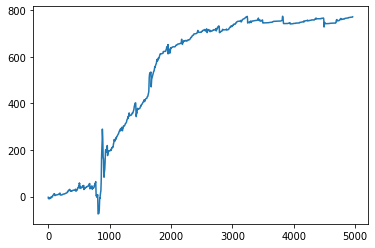

In [49]:
total_profits = yht_rc_ana_df["profits_calc"].sum()
maxDD = -(duka_5m_ana_df["floating_profit"].min()) if duka_5m_ana_df["floating_profit"].min() != 0 else 1e-10
p_divide_mdd = -1 if abs(total_profits / maxDD) > 1e+9 or total_profits == 0 else abs(total_profits / maxDD)
print("finally profits: ", total_profits)
print("maxDD: ", maxDD)
print("total # of trades: ", yht_rc_ana_df["symbol"].count())
print("total lots: ", yht_rc_ana_df["lots"].sum())
print("profits / madDD: ", p_divide_mdd)
# duka_5m_ana_df["floating_profit"].plot()
yht_rc_ana_df["profits_calc"].cumsum().plot()

In [50]:
calc_sr(yht_rc_ana_df["profits_calc"])

0.17459555004731436

# Some summary about the calculations of return.

# http://www.turingfinance.com/computational-investing-with-python-week-one/